# Green's Function: Tightrope Walker
In class (notes section 12), we solved a really simple inhhomogeneous ODE:
$$
    \frac{d^2 y}{dx^2}=W(x), \quad y(0)=y(\ell)=0. \quad (1)
$$
The Green's function, written as an eigenfunction expansion, looked really inscrutable:
$$
        G(x,x') = \sum_{n=1}^{\infty} \frac{-2\ell}{\pi^2 n^2} 
        \sin(\pi n x/\ell)\,\sin(\pi n x'/\ell).
        \quad (2)
$$
This should, of course, be the solution to
$$
        \frac{\partial^2}{\partial x^2} G(x,x') = \delta(x-x'). \quad (3)
$$
Physically, it correspondes to the shape of a massless tightrope with a tightrope walker at $x=x'$. Below I investigate the shape of $G$, taking $\ell=1$ without loss of generality. This is a lovely example of the convergence of a Fourier sine series.

<IPython.core.display.Javascript object>


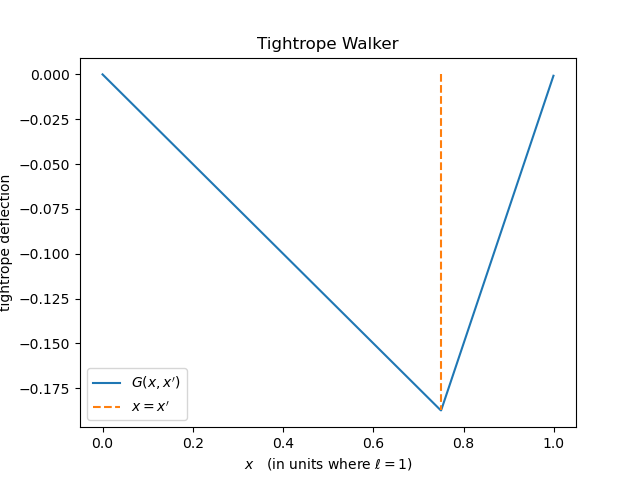

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

dx = 0.001
x = np.arange(0,1,dx)
xp = 0.75
G = np.zeros(x.shape)
Nterms = 1000
for k in range(1,Nterms):
    G += -(2/np.pi**2/k**2) * np.sin(np.pi * k * x) * np.sin(np.pi * k * xp)

plt.figure()
plt.plot(x,G,label=r"$G(x,x')$")
plt.plot(xp*np.array((1,1)), np.amin(G)*np.array((0,1)),'--', label="$x=x'$")
plt.title('Tightrope Walker')
plt.xlabel(r'$x \quad(\rm{in\ units\ where\ }\ell=1)$')
plt.ylabel(r'tightrope deflection')
plt.legend();

## Discontinuity in Slope
If we integrate equation (3), we find that there should be a change in slope of unity at $x=x'$. That is,
$$
\left. \frac{\partial G}{\partial x} \right|_{x=x'-\epsilon}^{x'+\epsilon} = 1.
$$
This can be seen quite clearly if we use finite differencing to calculate the slope of the Green's function:

<IPython.core.display.Javascript object>


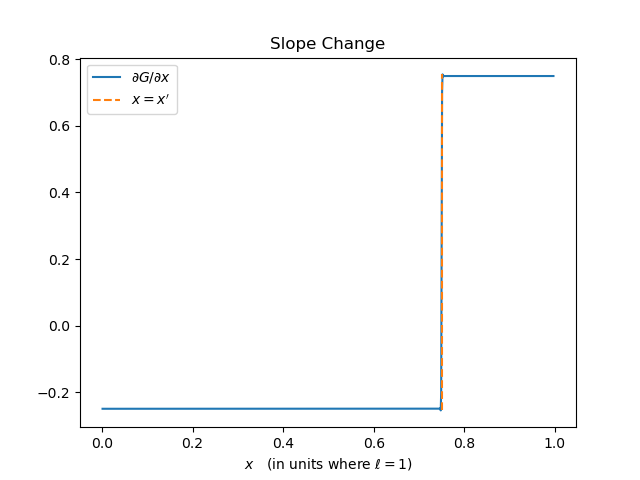

In [2]:
dG_dx = (np.roll(G,-1) - np.roll(G,1))/(2*dx)

plt.figure()
plt.plot(x[1:-2],dG_dx[1:-2], label='$\partial G / \partial x$')
plt.plot(xp*np.array((1,1)), np.array((np.amin(dG_dx),np.amax(dG_dx))),'--', 
         label="$x=x'$")
plt.xlabel(r'$x \quad(\rm{in\ units\ where\ }\ell=1)$')
plt.title('Slope Change')
plt.legend();